In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
import pandas as pd

data = pd.read_csv("/content/Online_Retail.csv",  encoding='latin1')
data_copy = data.copy()

data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [58]:
#Number of null values

data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,573
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,46477
Country,0


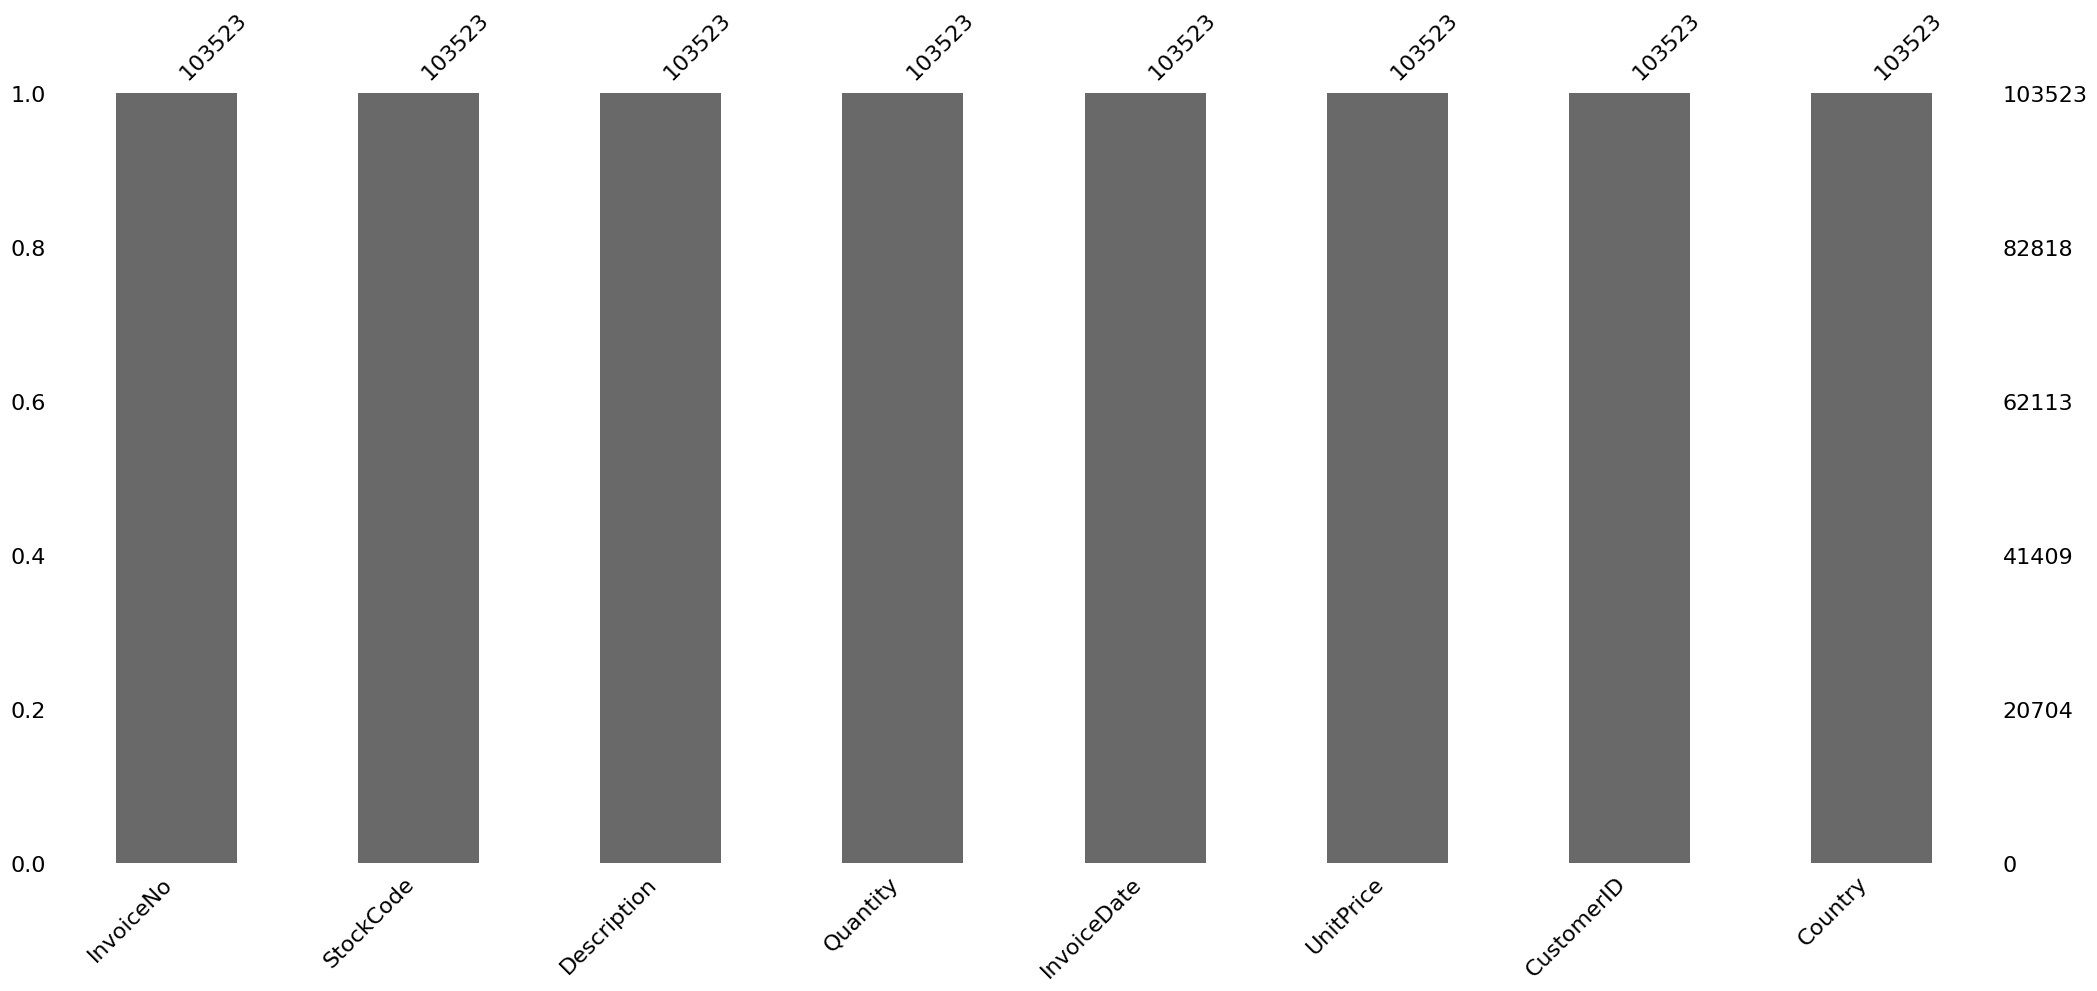

In [59]:
#Remove them and visualize using missingno
import missingno as ms
import matplotlib.pyplot as plt

data = data.dropna()
ms.bar(data)
plt.show()

In [60]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [61]:
#Create a new column
data['Total'] = data['Quantity'] * data["UnitPrice"]

data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08


In [62]:
print(data[data['Total'] <= 0])

       InvoiceNo StockCode                         Description  Quantity  \
141      C536379         D                            Discount        -1   
154      C536383    35004C     SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556      PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984    PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983    PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                                 ...       ...   
149291   C549288     22469               HEART OF WICKER SMALL        -1   
149314   C549290     37449  CERAMIC CAKE STAND + HANGING CAKES        -1   
149915   C549315     21876                       POTTERING MUG        -3   
149916   C549315     21868                POTTING SHED TEA MUG        -2   
149917   C549315     22697     GREEN REGENCY TEACUP AND SAUCER        -1   

          InvoiceDate  UnitPrice  CustomerID         Country  Total  
141      12/1/10 

their invoiceNo starts with C, it means they are canceled. In RFM analysis, we should delete them


In [63]:
data = data.drop(data[data['Total'] <= 0].index)
print(data[data['Total'] <= 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Total]
Index: []


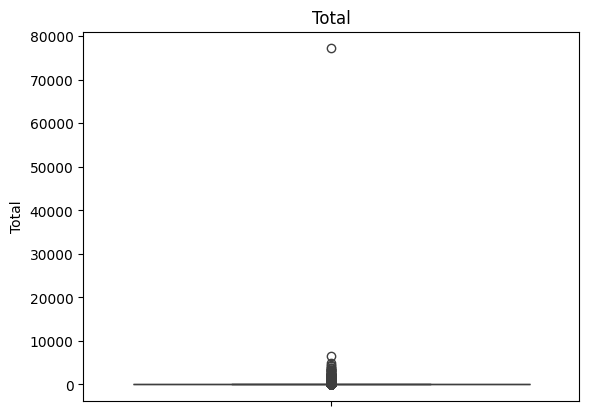

In [64]:
#outliers checking
import seaborn as sns

sns.boxplot(data['Total'])
plt.title("Total")
plt.show()

In [65]:
#fix outliers
q1 = data['Total'].quantile(0.25)
q3 = data['Total'].quantile(0.75)

iqr = q3 - q1

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

data = data[~((data['Total'] > upper) | (data['Total'] < lower))]

print(data.shape)

(92319, 9)


In [66]:
data = data.reset_index(drop = True)
print(data)

      InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
92314    549317     22423             REGENCY CAKESTAND 3 TIER         2   
92315    549317     21843             RED RETROSPOT CAKE STAND         2   
92316    549317     22853               CAT BOWL VINTAGE CREAM         6   
92317    549317     22852               DOG BOWL VINTAGE CREAM         4   
92318    549317     22845     VINTAGE CREAM CAT FOOD CONTAINER         2   

        InvoiceDate  UnitPrice  CustomerID         Country  Total  
0      12/1/10 8:26

In [67]:
data['CustomerID'] = data['CustomerID'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92319 entries, 0 to 92318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    92319 non-null  object 
 1   StockCode    92319 non-null  object 
 2   Description  92319 non-null  object 
 3   Quantity     92319 non-null  int64  
 4   InvoiceDate  92319 non-null  object 
 5   UnitPrice    92319 non-null  float64
 6   CustomerID   92319 non-null  int64  
 7   Country      92319 non-null  object 
 8   Total        92319 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 6.3+ MB


change date into date format


In [68]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92319 entries, 0 to 92318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    92319 non-null  object        
 1   StockCode    92319 non-null  object        
 2   Description  92319 non-null  object        
 3   Quantity     92319 non-null  int64         
 4   InvoiceDate  92319 non-null  datetime64[ns]
 5   UnitPrice    92319 non-null  float64       
 6   CustomerID   92319 non-null  int64         
 7   Country      92319 non-null  object        
 8   Total        92319 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.3+ MB


In [73]:
import datetime as dt

today = data['InvoiceDate'].max()
today = dt.datetime(2011, 4, 8, 9, 58, 0)
print(today)

2011-04-08 09:58:00


In [75]:
#Recency (R)

r = (today - data.groupby("CustomerID").agg({"InvoiceDate": "max"})).apply(lambda x: x.dt.days)
print(r)

            InvoiceDate
CustomerID             
12347                 0
12348                 2
12350                64
12352                16
12356                80
...                 ...
18269               120
18270                20
18272                 1
18280                32
18283                38

[2108 rows x 1 columns]


In [79]:
#Frequency (F)

f = data.groupby(["CustomerID", "InvoiceNo"]).agg({"InvoiceNo": "count"})
f = f.groupby("CustomerID").agg({"InvoiceNo": "count"})

print(f)

            InvoiceNo
CustomerID           
12347               3
12348               3
12350               1
12352               4
12356               1
...               ...
18269               1
18270               1
18272               1
18280               1
18283               3

[2108 rows x 1 columns]


In [80]:
#Monetary Value (M)

m = data.groupby("CustomerID").agg({"Total": "sum"})
print(m)

              Total
CustomerID         
12347       1447.23
12348        311.08
12350        334.40
12352        721.51
12356        325.12
...             ...
18269        168.60
18270        111.95
18272        589.42
18280        180.60
18283        317.90

[2108 rows x 1 columns]


In [88]:
#RFM

rfm = r.merge(f, on = "CustomerID").merge(m, on = "CustomerID")
rfm = rfm.reset_index()
rfm = rfm.rename(columns = {"CustomerID": "ID",
                  "InvoiceDate": "Recency",
                  "InvoiceNo": "Frequency",
                  "Total": "Monetary"})

rfm

,ID,Recency,Frequency,Monetary
0,12347,0,3,1447.23
1,12348,2,3,311.08
2,12350,64,1,334.40
3,12352,16,4,721.51
4,12356,80,1,325.12
...,...,...,...,...
2103,18269,120,1,168.60
2104,18270,20,1,111.95
2105,18272,1,1,589.42
2106,18280,32,1,180.60


In [91]:
df = rfm.iloc[:, 1:]
df

,Recency,Frequency,Monetary
0,0,3,1447.23
1,2,3,311.08
2,64,1,334.40
3,16,4,721.51
4,80,1,325.12
...,...,...,...
2103,120,1,168.60
2104,20,1,111.95
2105,1,1,589.42
2106,32,1,180.60


In [92]:
#Preprocessing (Normalization)

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_norm = mms.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns = df.columns)

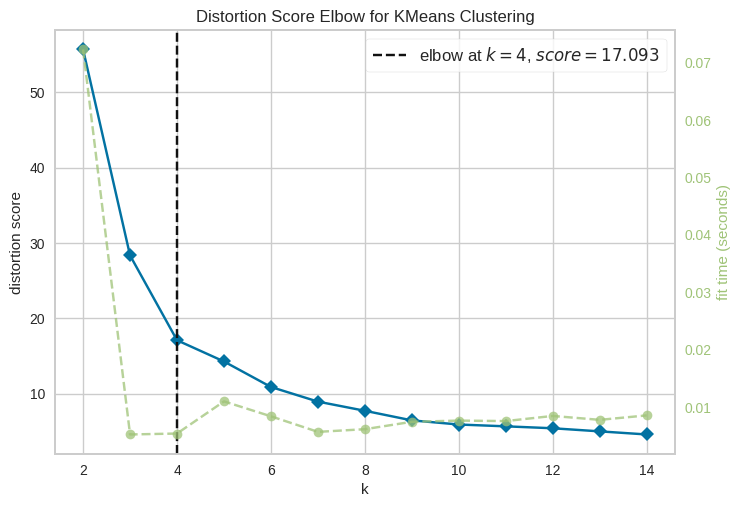

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
#KMeans Clustering

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmodel = KMeans(random_state = 42)
graph = KElbowVisualizer(kmodel, k = (2, 15))
graph.fit(df_norm)
graph.poof()

In [96]:
rfm['labels'] = labels
rfm

,ID,Recency,Frequency,Monetary,labels
0,12347,0,3,1447.23,1
1,12348,2,3,311.08,1
2,12350,64,1,334.40,0
3,12352,16,4,721.51,1
4,12356,80,1,325.12,0
...,...,...,...,...,...
2103,18269,120,1,168.60,3
2104,18270,20,1,111.95,1
2105,18272,1,1,589.42,1
2106,18280,32,1,180.60,2


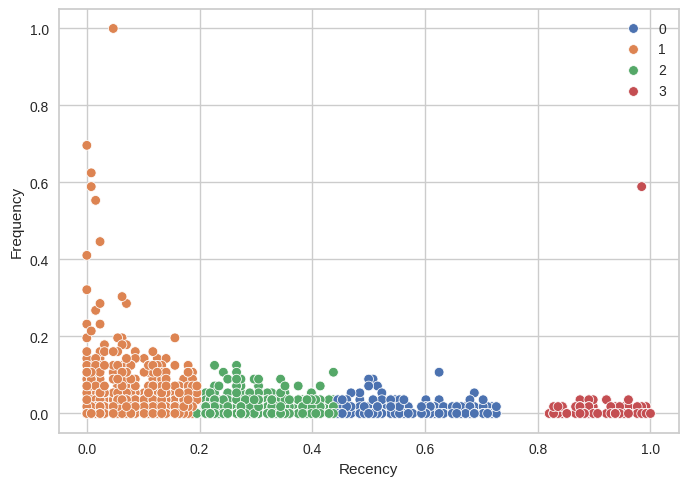

In [95]:
#KMeans model after Elbow

kmodel = KMeans(n_clusters = 4, init = "k-means++", random_state = 0)
kfit = kmodel.fit(df_norm)
labels = kmodel.labels_

sns.scatterplot(x = "Recency", y = "Frequency", palette = 'deep', hue = labels, data = df_norm)
plt.show()

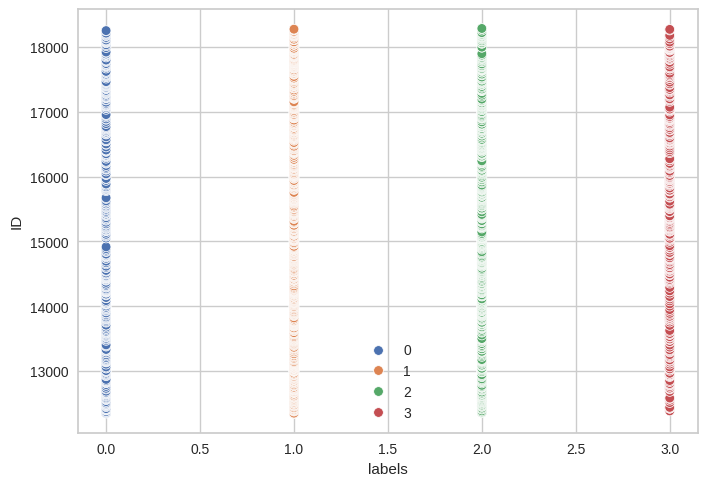

In [98]:
sns.scatterplot(x = 'labels', y = 'ID', data = rfm, palette = 'deep', hue = labels)
plt.show()

In [99]:
print(rfm.groupby('labels').mean().iloc[:, 1:])

           Recency  Frequency    Monetary
labels                                   
0        73.727053   1.393720  358.356473
1        10.995050   3.147277  760.278094
2        39.299824   1.758377  463.716861
3       118.579937   1.244514  275.072382


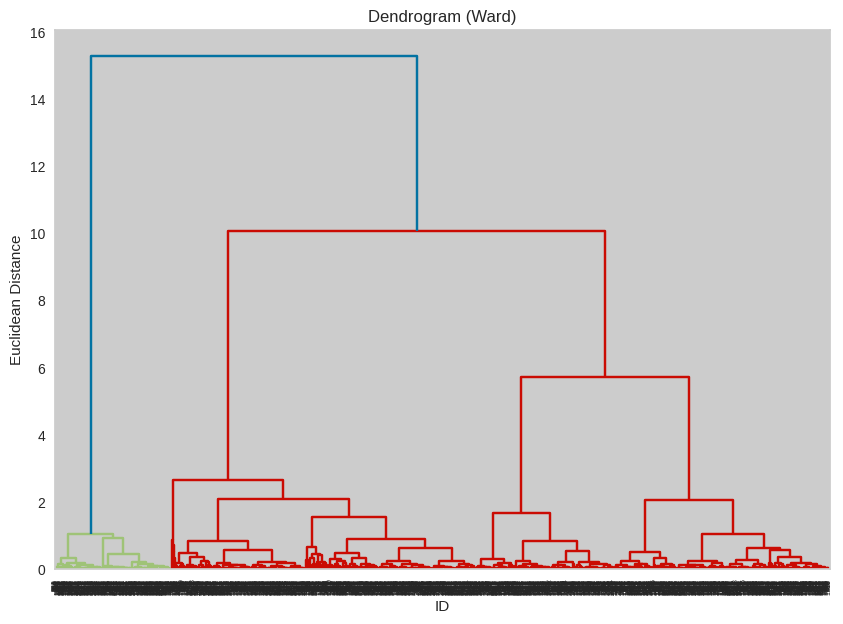

In [103]:
#Hierarchial model
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(df_norm, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram (Ward)')
plt.xlabel('ID')
plt.ylabel('Euclidean Distance')
plt.show()

In [110]:
rfm['cluster'] = fcluster(linked, 4, criterion='maxclust')

rfm

,ID,Recency,Frequency,Monetary,labels,cluster
0,12347,0,3,1447.23,1,2
1,12348,2,3,311.08,1,2
2,12350,64,1,334.40,0,3
3,12352,16,4,721.51,1,2
4,12356,80,1,325.12,0,3
...,...,...,...,...,...,...
2103,18269,120,1,168.60,3,1
2104,18270,20,1,111.95,1,2
2105,18272,1,1,589.42,1,2
2106,18280,32,1,180.60,2,4


In [116]:
# Analyze the RFM statistics for each cluster
print(rfm.groupby('cluster').mean().iloc[:, 1:4])

            Recency  Frequency    Monetary
cluster                                   
1        118.579937   1.244514  275.072382
2         11.414958   3.137515  768.803221
3         75.435484   1.373656  337.932742
4         41.096939   1.709184  446.501514


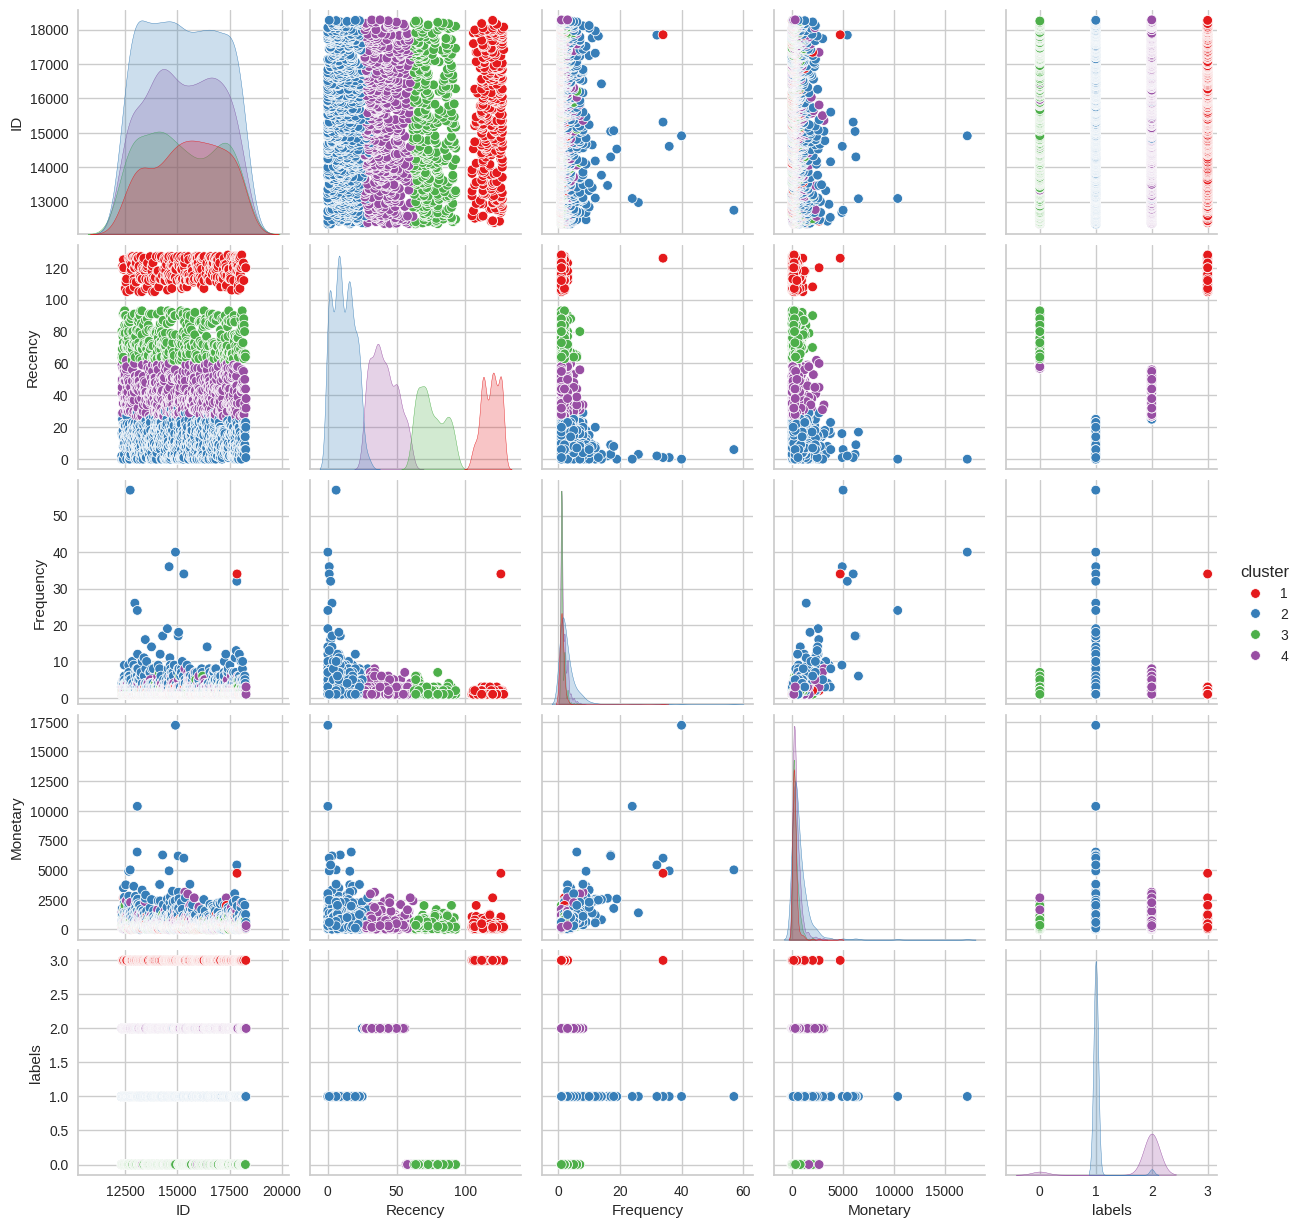

In [113]:
# Visualize RFM data using a pairplot
sns.pairplot(rfm, hue='cluster', palette='Set1')
plt.show()

In [119]:
#which one kmeans or hierarchial?

from sklearn.metrics import silhouette_score

#score for kmeans
kmeans = kmodel.fit_predict(df_norm)
kmeans_ss = silhouette_score(df_norm, kmeans)

#score for hierarchial clustering
hierarc = fcluster(link, t=4, criterion='maxclust')
hierarc_ss = silhouette_score(df_norm, hierarc)

print(f"KMeans: {round(kmeans_ss * 100, 2)}")
print(f"Hierarchial: {round(hierarc_ss * 100, 2)}")

KMeans: 56.56
Hierarchial: 56.45


when silhoutte score high, it means better performance.

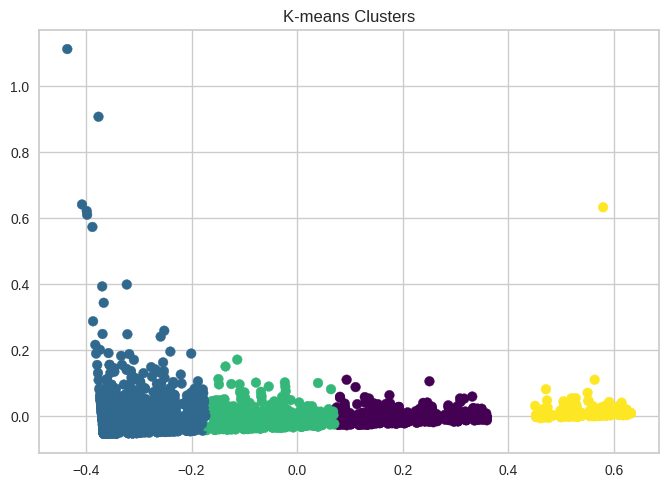

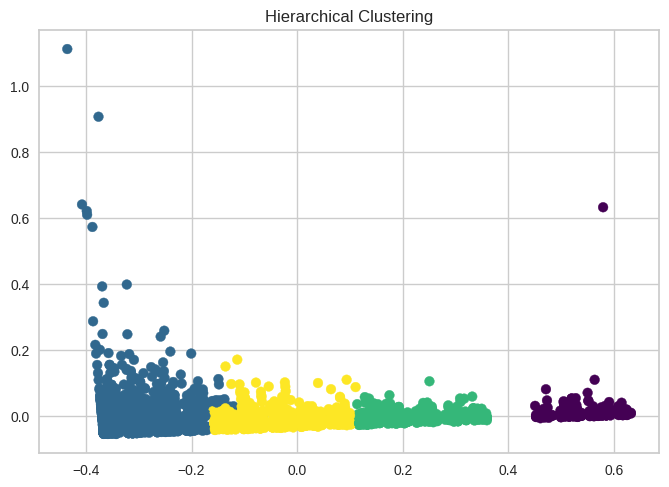

In [123]:
from sklearn.decomposition import PCA

# K-means PCA
pca_kmeans = PCA(n_components=2).fit_transform(df_norm)
plt.scatter(pca_kmeans[:, 0], pca_kmeans[:, 1], c=kmeans, cmap='viridis')
plt.title("K-means Clusters")
plt.show()

# Hierarchical PCA
pca_hierarchical = PCA(n_components=2).fit_transform(df_norm)
plt.scatter(pca_hierarchical[:, 0], pca_hierarchical[:, 1], c=hierarc, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()
